
=== HUKUM NEWTON I ===

Gaya-gaya yang bekerja:
W (Berat)      = (0.0 , -19.6) N
N (Normal)     = (0.0 , 19.6) N
F Tarik Kiri   = (-18 , 0) N

Perhitungan Resultan Sumbu X:
ΣFx = 0.0 + 0.0 + -18
ΣFx = -18.0 N

Perhitungan Resultan Sumbu Y:
ΣFy = -19.6 + 19.6 + 0
ΣFy = 0.0 N

Resultan Gaya Total:
ΣF = (-18.0 , 0.0) N

Kesimpulan:
ΣF ≠ 0 → Benda TIDAK setimbang
Buku bergerak searah resultan


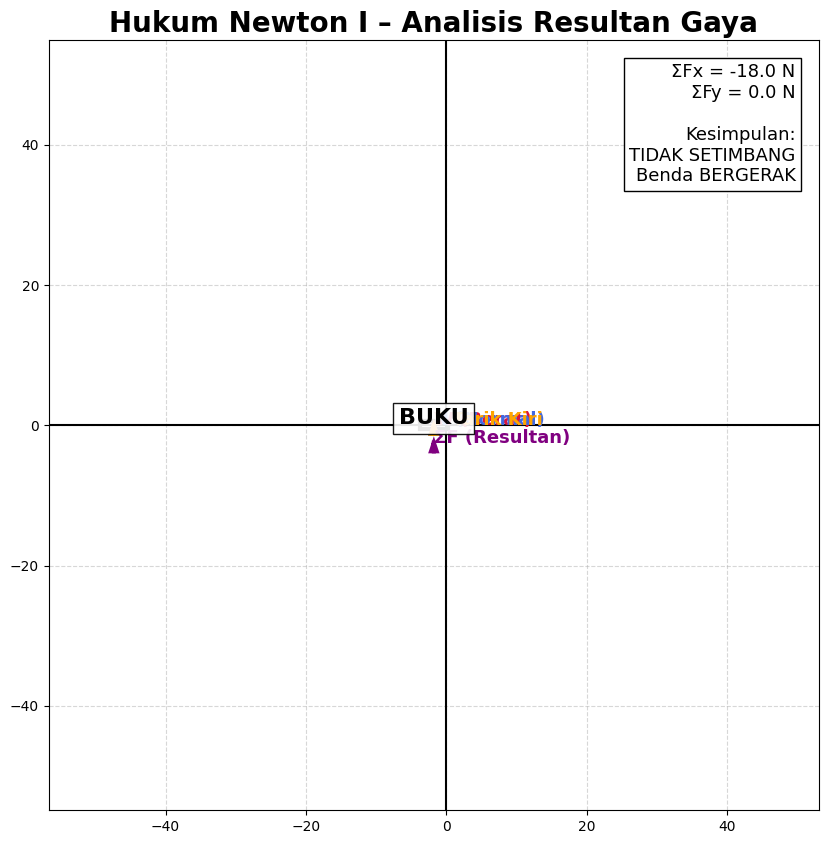

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# ==========================================================
# PARAMETER FISIKA (BEBAS DIUBAH SAAT DITANYA DOSEN)
# ==========================================================
m = 2.0
g = 9.8

# ==========================================================
# GAYA-GAYA (VEKTOR + WARNA)
# ==========================================================
forces = {
    "W (Berat)":        (np.array([0, -m*g]), "crimson"),
    "N (Normal)":      (np.array([0,  m*g]), "royalblue"),

    # --------------------------------------------------
    # GAYA HORIZONTAL / VERTIKAL (UBAH SAAT PRESENTASI)
    # --------------------------------------------------
    # "F Dorong Kanan":  (np.array([12, 0]), "green"),
    "F Tarik Kiri":   (np.array([-18, 0]), "orange"),
    # "F Tarik Atas":   (np.array([0, 8]), "purple"),
}

# ==========================================================
# HITUNG RESULTAN (DETAIL UNTUK DOSEN)
# ==========================================================
forces_list = list(forces.items())

Fx_terms = [F[0] for _, (F, _) in forces_list]
Fy_terms = [F[1] for _, (F, _) in forces_list]

sumFx = sum(Fx_terms)
sumFy = sum(Fy_terms)

sumF = np.array([sumFx, sumFy])

print("\n=== HUKUM NEWTON I ===\n")

print("Gaya-gaya yang bekerja:")
for name, (F, _) in forces_list:
    print(f"{name:<14} = ({F[0]} , {F[1]}) N")

print("\nPerhitungan Resultan Sumbu X:")
print("ΣFx = " + " + ".join(str(fx) for fx in Fx_terms))
print(f"ΣFx = {sumFx} N")

print("\nPerhitungan Resultan Sumbu Y:")
print("ΣFy = " + " + ".join(str(fy) for fy in Fy_terms))
print(f"ΣFy = {sumFy} N")

print("\nResultan Gaya Total:")
print(f"ΣF = ({sumFx} , {sumFy}) N")

print("\nKesimpulan:")
if sumFx == 0 and sumFy == 0:
    print("ΣF = 0 → Benda SETIMBANG")
    print("Buku tetap DIAM")
elif sumFx != 0 or sumFy != 0:
    print("ΣF ≠ 0 → Benda TIDAK setimbang")
    print("Buku bergerak searah resultan")

# ==========================================================
# POSISI & KECEPATAN BUKU
# ==========================================================
x_book = 0.0
y_book = 0.0
v = 0.08

# ==========================================================
# FUNGSI GAMBAR PANAH
# ==========================================================
def draw_force(ax, F, label, color, scale, origin=(0,0)):
    ox, oy = origin
    ax.arrow(
        ox, oy,
        F[0]*scale, F[1]*scale,
        head_width=0.8,
        head_length=1.2,
        length_includes_head=True,
        linewidth=3,
        color=color,
        zorder=3
    )
    ax.text(
        ox + F[0]*scale*1.05,
        oy + F[1]*scale*1.05,
        label,
        fontsize=13,
        color=color,
        weight="bold",
        zorder=4
    )

# ==========================================================
# SETUP FIGURE
# ==========================================================
fig, ax = plt.subplots(figsize=(10,10))

def update(frame):
    global x_book, y_book
    ax.clear()

    # ----------------------
    # GERAK BUKU SESUAI ARAH RESULTAN
    # ----------------------
    if sumF[0] > 0:
        x_book += v
    elif sumF[0] < 0:
        x_book -= v

    if sumF[1] > 0:
        y_book += v
    elif sumF[1] < 0:
        y_book -= v

    # ----------------------
    # GAMBAR BUKU
    # ----------------------
    book = Rectangle((x_book-2, y_book-0.6), 4, 1.2,
                     fill=False, linewidth=3)
    ax.add_patch(book)

    ax.text(
        x_book, y_book + 1.0, "BUKU",
        ha="center", va="center",
        fontsize=16, weight="bold",
        bbox=dict(facecolor="white", alpha=0.9),
        zorder=5
    )

    scale = frame / 15

    # ----------------------
    # GAMBAR GAYA
    # ----------------------
    for name, (F, col) in forces.items():
        draw_force(ax, F, name, col, scale, origin=(x_book, y_book))

    # ----------------------
    # GAMBAR RESULTAN
    # ----------------------
    if not np.allclose(sumF, [0,0]):
        draw_force(
            ax,
            sumF,
            "ΣF (Resultan)",
            "purple",
            scale,
            origin=(x_book, y_book-2.5)
        )

    # ----------------------
    # KOTAK INFO
    # ----------------------
    info = (
        f"ΣFx = {sumFx} N\n"
        f"ΣFy = {sumFy} N\n\n"
        "Kesimpulan:\n"
        + ("SETIMBANG\nBenda DIAM" if sumFx == 0 and sumFy == 0
           else "TIDAK SETIMBANG\nBenda BERGERAK")
    )

    ax.text(
        0.97, 0.97,
        info,
        transform=ax.transAxes,
        ha="right", va="top",
        fontsize=13,
        bbox=dict(facecolor="white", edgecolor="black"),
        zorder=10
    )

    # ----------------------
    # SETTING GRAFIK
    # ----------------------
    max_range = max(np.linalg.norm(F) for F, _ in forces.values()) * 2.8
    ax.set_xlim(-max_range + x_book, max_range + x_book)
    ax.set_ylim(-max_range + y_book, max_range + y_book)

    ax.axhline(0, color="black")
    ax.axvline(0, color="black")
    ax.set_aspect("equal")
    ax.grid(True, linestyle="--", alpha=0.5)

    ax.set_title(
        "Hukum Newton I – Analisis Resultan Gaya",
        fontsize=20,
        weight="bold"
    )

ani = FuncAnimation(fig, update, frames=20, interval=200)
HTML(ani.to_jshtml())
